Importing the libraries

#BHARAT INTERN
#DOMAIN - DATA SCIENCE INTERN
#TASK 3 - NUMBER RECOGNITION
#NAME - ADITYA KUMAR
#IN THIS TASK WE WILL USE MNIST DATASET

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

Load and preprocess the MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten the input images from 28x28 pixels to 784-dimensional vectors
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')

# Normalize the pixel values between 0 and 1
X_train /= 255
X_test /= 255

# Convert the target labels to categorical one-hot encoding
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

11490434/11490434 [==============================] - 0s 0us/step


Building the neural network model

In [3]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Train the model

In [4]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128)


Epoch 1/10
469/469 [==============================] - 19s 38ms/step - loss: 0.2526 - accuracy: 0.9238 - val_loss: 0.0975 - val_accuracy: 0.9677
Epoch 2/10
469/469 [==============================] - 11s 24ms/step - loss: 0.1002 - accuracy: 0.9684 - val_loss: 0.0733 - val_accuracy: 0.9763
Epoch 3/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0723 - accuracy: 0.9771 - val_loss: 0.0739 - val_accuracy: 0.9764
Epoch 4/10
469/469 [==============================] - 10s 22ms/step - loss: 0.0557 - accuracy: 0.9818 - val_loss: 0.0621 - val_accuracy: 0.9798
Epoch 5/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0636 - val_accuracy: 0.9806
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0385 - accuracy: 0.9874 - val_loss: 0.0624 - val_accuracy: 0.9813
Epoch 7/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0337 - accuracy: 0.9887 - val_loss: 0.0702 - val_accuracy:

Evaluate the model

In [8]:
accuracy = model.evaluate(X_test, y_test)[1]
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.0758 - accuracy: 0.9807
Accuracy: 0.9807000160217285


Plot the training history

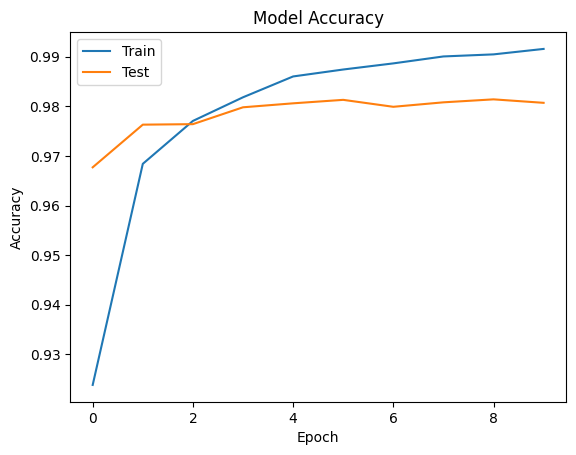

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

making predictions

In [10]:
# Predict on a single image
digit = X_test[0]
digit = np.expand_dims(digit, axis=0)
prediction = model.predict(digit)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)

1/1 [==============================] - 0s 93ms/step
Predicted digit: 7


End :)